# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at a used car dealership in the UK. The sales team have been having problems with pricing used cars that arrive at the dealership and would like your help. Before they take any company wide action they would like you to work with the Toyota specialist to test your idea. They have already collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

The presentation of your findings should be targeted at the Head of Sales, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The analysis proceeds through the following workflow:
 Importing Data
 Exploratory Data Analysis (EDA)
 Uni-Variate and MutliVariate Analysis
 Visualization of data, its distribution and central tendencies
 Exploration of Correlation between variables
 Preprocessing and Feature Engineering including Variable Transformations
 Model Fitting
 Model Evaluation

In [58]:
import matplotlib
colors = matplotlib.colors.cnames.keys()

In [3]:
df = pd.read_csv('data/toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Our dataset has no null values.

In [5]:
df.shape

(6738, 9)

In [56]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


<AxesSubplot:xlabel='price', ylabel='Density'>

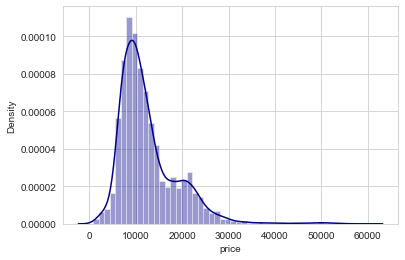

In [38]:
sns.set_style('whitegrid')
sns.distplot(df['price'], color = 'darkblue') #distribution of the target variable

In [7]:
df['fuelType'].value_counts()

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

<AxesSubplot:xlabel='mileage', ylabel='price'>

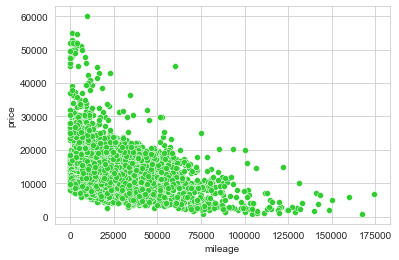

In [53]:
sns.scatterplot(x = 'mileage', y = 'price', data = df, color = 'limegreen')

The general trend steeps toward telling us that the increase in mileage decreases the prices. 

<AxesSubplot:>

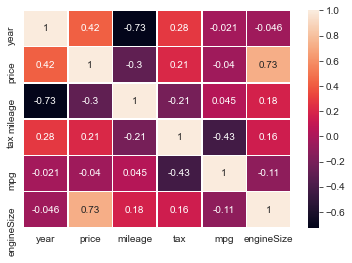

In [9]:
sns.heatmap(df.corr(), annot = True, linewidth = 0.5)

<AxesSubplot:ylabel='price'>

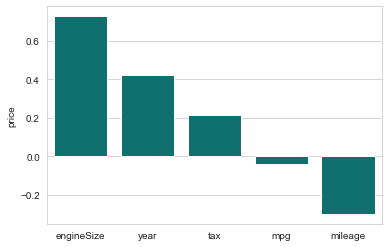

In [10]:
corr = df.corr()['price'].sort_values(ascending = False)[1:]
sns.barplot(x = corr.index, y = corr, color = 'teal')

From the above correlation plots, we are able to know the variables that have the most impact on the car prices. So, in order for us to attempt to decrease the sale prices, we have to keep specifically these attributes in mind. The car models are not inlcuded above, so I will now turn to explore the correlation between the models, other variables and car prices. 

In [11]:
df['model'].value_counts()

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' GT86'),
  Text(1, 0, ' Corolla'),
  Text(2, 0, ' RAV4'),
  Text(3, 0, ' Yaris'),
  Text(4, 0, ' Auris'),
  Text(5, 0, ' Aygo'),
  Text(6, 0, ' C-HR'),
  Text(7, 0, ' Prius'),
  Text(8, 0, ' Avensis'),
  Text(9, 0, ' Verso'),
  Text(10, 0, ' Hilux'),
  Text(11, 0, ' PROACE VERSO'),
  Text(12, 0, ' Land Cruiser'),
  Text(13, 0, ' Supra'),
  Text(14, 0, ' Camry'),
  Text(15, 0, ' Verso-S'),
  Text(16, 0, ' IQ'),
  Text(17, 0, ' Urban Cruiser')])

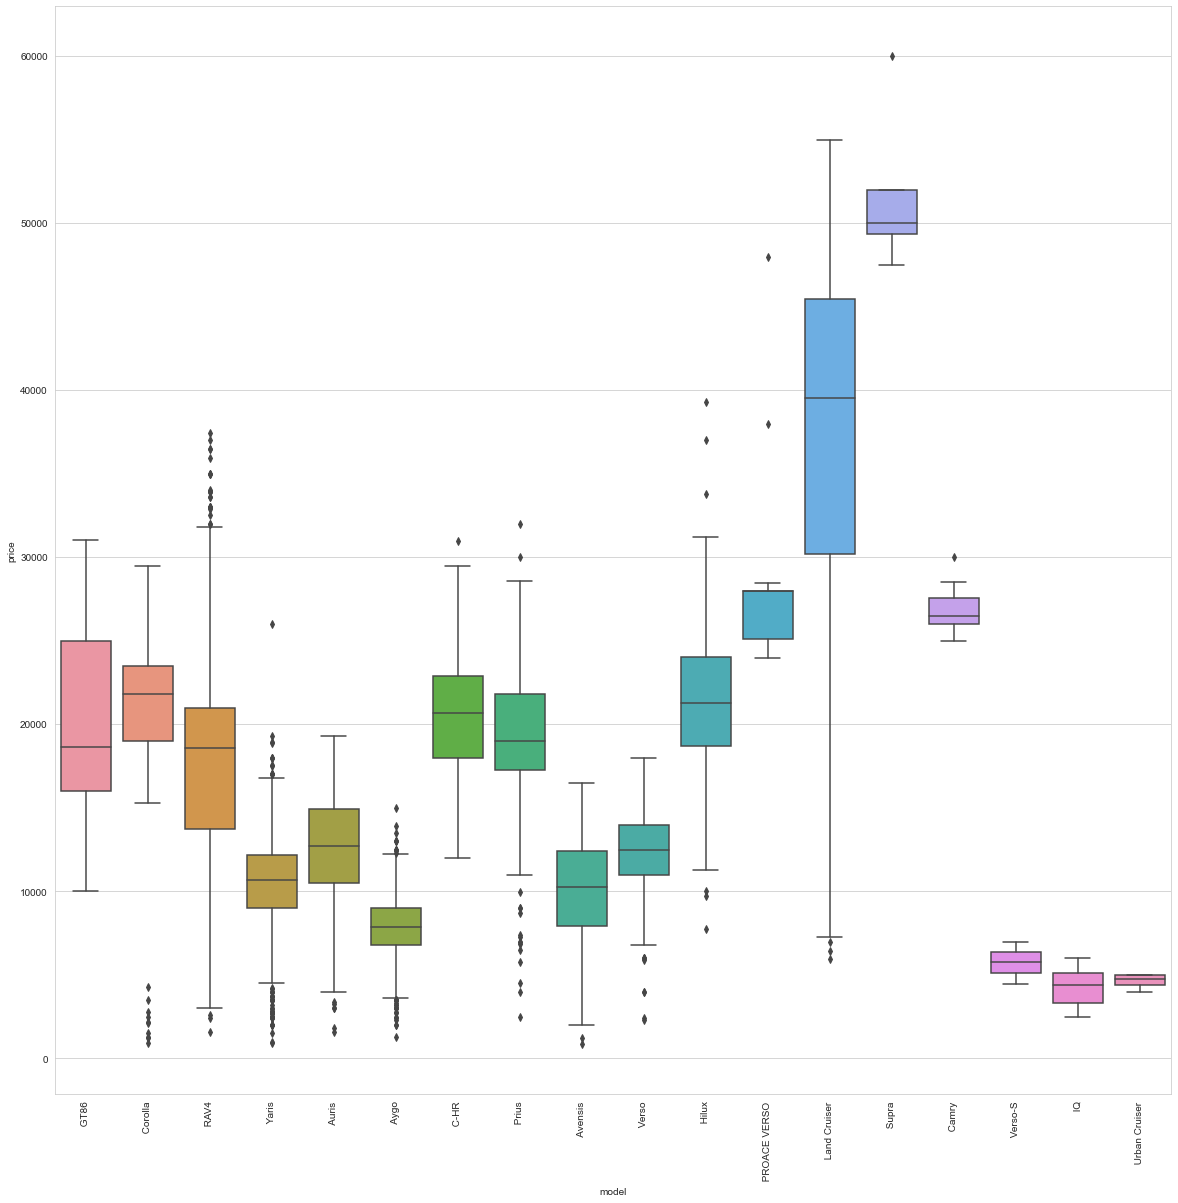

In [12]:
plt.figure(figsize = (20,20))
sns.boxplot(x = 'model', y = 'price', data = df)
plt.xticks(rotation = 90)

The above visualization shows us the models that tend to be the most expensive. The models 'Land cruiser' and 'Supra' look to be more on the expensive side. And the general central tendencies of their costs.

<AxesSubplot:xlabel='year', ylabel='price'>

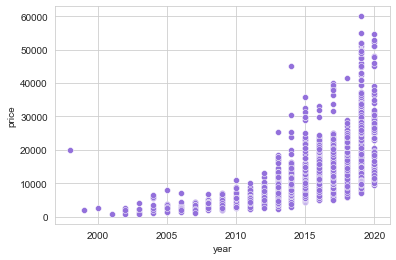

In [13]:
sns.scatterplot(x = 'year', y = 'price', data =df, color = 'mediumpurple')

<AxesSubplot:xlabel='engineSize', ylabel='price'>

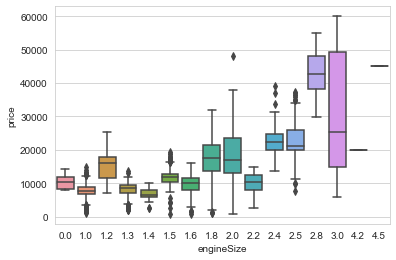

In [14]:
sns.boxplot(x = 'engineSize', y = 'price', data = df)

The following lines of code are mostly concerned with preprocessing the data to feed our machine learning model.

In [15]:
df_dumms = pd.get_dummies(df['model'], drop_first = True)
df_all = df_dumms.join(df)
df_all.drop('model', axis = 1, inplace = True)
df_all

,Avensis,Aygo,C-HR,Camry,Corolla,GT86,Hilux,IQ,Land Cruiser,PROACE VERSO,...,Verso-S,Yaris,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,0,0,0,0,1,0,0,0,0,...,0,0,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,0,0,0,0,0,0,0,1,0,0,...,0,0,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,0,0,0,0,0,0,0,0,0,0,...,0,0,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,0,0,0,0,0,0,0,0,0,0,...,0,0,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,0,0,0,0,0,0,0,0,0,0,...,0,0,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [16]:
df_all['transmission'].value_counts()

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

In [17]:
df_all['transmissions'] = 0
df_all.loc[df_all['transmission'] == 'Automatic', 'transmissions'] = 0
df_all.loc[df_all['transmission'] == 'Manual', 'transmissions'] = 1
df_all.loc[df_all['transmission'] == 'Semi-Auto', 'transmissions'] = 2
df_all.loc[df_all['transmission'] == 'Other', 'transmissions'] = 3
df_all['transmissions'].value_counts()

1    3826
0    2657
2     254
3       1
Name: transmissions, dtype: int64

In [18]:
df['fuelType'].value_counts()

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

In [19]:
df_dumms2 = pd.get_dummies(df['fuelType'], drop_first = True)
df_all2 = df_dumms2.join(df_all)
df_all2

,Hybrid,Other,Petrol,Avensis,Aygo,C-HR,Camry,Corolla,GT86,Hilux,...,Yaris,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,transmissions
0,0,0,1,0,0,0,0,0,1,0,...,0,2016,16000,Manual,24089,Petrol,265,36.2,2.0,1
1,0,0,1,0,0,0,0,0,1,0,...,0,2017,15995,Manual,18615,Petrol,145,36.2,2.0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,2015,13998,Manual,27469,Petrol,265,36.2,2.0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,2017,18998,Manual,14736,Petrol,150,36.2,2.0,1
4,0,0,1,0,0,0,0,0,1,0,...,0,2017,17498,Manual,36284,Petrol,145,36.2,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,0,0,1,0,0,0,0,0,0,0,...,0,2011,5500,Automatic,30000,Petrol,20,58.9,1.0,0
6734,0,0,1,0,0,0,0,0,0,0,...,0,2011,4985,Manual,36154,Petrol,125,50.4,1.3,1
6735,0,0,0,0,0,0,0,0,0,0,...,0,2012,4995,Manual,46000,Diesel,125,57.6,1.4,1
6736,0,0,1,0,0,0,0,0,0,0,...,0,2011,3995,Manual,60700,Petrol,125,50.4,1.3,1


In [20]:
df_all2.drop('transmission', axis = 1, inplace = True)

In [22]:
df_all2.drop('fuelType', axis = 1, inplace = True)

In [23]:
df_all2

,Hybrid,Other,Petrol,Avensis,Aygo,C-HR,Camry,Corolla,GT86,Hilux,...,Verso,Verso-S,Yaris,year,price,mileage,tax,mpg,engineSize,transmissions
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,2016,16000,24089,265,36.2,2.0,1
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,2017,15995,18615,145,36.2,2.0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,2015,13998,27469,265,36.2,2.0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,2017,18998,14736,150,36.2,2.0,1
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,2017,17498,36284,145,36.2,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2011,5500,30000,20,58.9,1.0,0
6734,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2011,4985,36154,125,50.4,1.3,1
6735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2012,4995,46000,125,57.6,1.4,1
6736,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2011,3995,60700,125,50.4,1.3,1


From here on, we start building and evaluating our machine learning model. I have chosen a regression model here. 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score


X= df_all2.drop('price', axis = 1)
y = df_all2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.head()

,Hybrid,Other,Petrol,Avensis,Aygo,C-HR,Camry,Corolla,GT86,Hilux,...,Urban Cruiser,Verso,Verso-S,Yaris,year,mileage,tax,mpg,engineSize,transmissions
2364,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2019,15010,135,76.3,1.5,0
944,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2017,20644,0,78.0,1.5,0
5354,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,2016,18376,0,69.0,1.0,1
5818,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,2017,19494,145,47.1,1.2,1
5563,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,2020,472,145,56.5,1.0,1


In [32]:
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** (1/2)
    mae = mean_absolute_error(y_true, y_pred)
    
    print('The mean absolute error is:', mae)
    print('The mean squared error is:', mse)
    print('The root mean squared error is:', rmse)
     

All of these evaluation metrics are basically different kinds of loss functions. So, we try to build models that minimize them as much as possible.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_preds = model.predict(X_test)
y_preds

array([25431.89818282,  2176.28809898, 12154.93042185, ...,
        8209.15956432, 11490.42226689, 12233.22083653])

In [33]:
evaluate(y_test, y_preds)

The mean absolute error is: 1152.3477653080706
The mean squared error is: 3049397.005127399
The root mean squared error is: 1746.252274193909


In [35]:
cvs = cross_val_score(model, X, y , cv = 10) 
cvs

array([0.30535132, 0.89064857, 0.79816169, 0.67163502, 0.80259153,
       0.89310295, 0.58823345, 0.45898148, 0.91390516, 0.06228371])

The results of the k-fold cross valuation scores help us to check if we have overfit the data. Since no values are very close to one, we can ce assured that our model has not overfit. We also have relatively high accuracies in each iteration which helps us further to accept our trained model.

<AxesSubplot:ylabel='Density'>

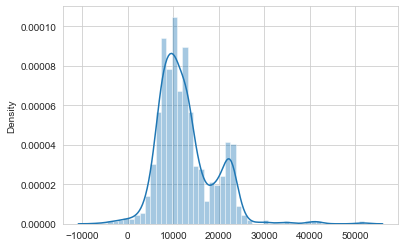

In [36]:
sns.distplot(y_preds)

Text(0, 0.5, 'Predicted y values')

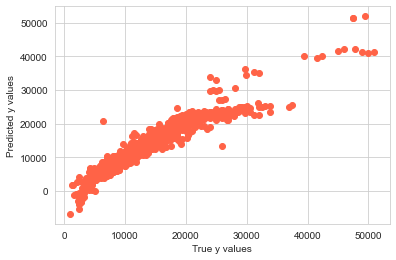

In [44]:
plt.scatter(y_test, y_preds, color = 'tomato')
plt.xlabel('True y values')
plt.ylabel('Predicted y values')

In [45]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
y_preds2 = model2.predict(X_test)

In [48]:
y_preds2

array([33995.,  3490., 10995., ...,  8712., 13000., 11200.])

In [50]:
evaluate(y_test, y_preds2)

The mean absolute error is: 1029.9938180019783
The mean squared error is: 2635042.9449802176
The root mean squared error is: 1623.2815359574006


In [57]:
cvs = cross_val_score(model2, X, y , cv = 10) 
cvs

array([0.67985976, 0.94468688, 0.7757612 , 0.77674217, 0.84449647,
       0.86979237, 0.62912267, 0.62299353, 0.89942221, 0.58082111])

<AxesSubplot:ylabel='Density'>

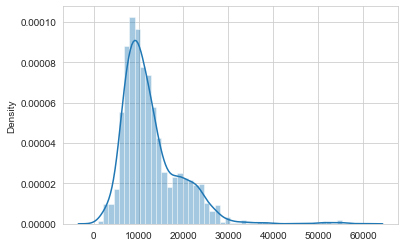

In [52]:
sns.distplot(y_preds2)

Text(0, 0.5, 'Predicted y values')

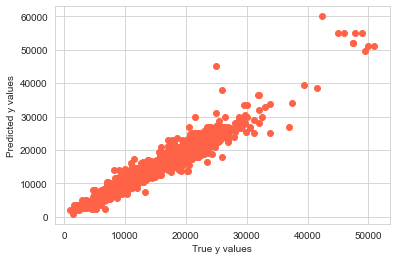

In [51]:
plt.scatter(y_test, y_preds2, color = 'tomato')
plt.xlabel('True y values')
plt.ylabel('Predicted y values')

It is clear through the evaluation metrics that DecisionTreeRegressor is a better suited model. 

Through the analysis made above, we are able to point out the exact variables that correlate to the high prices of our car sales. We are also able to derive thereafter the best measures to decrease the estimated prices. And, we now also know the better model to use for our predictions. The evaluate function in the notebook can also further be used to evaluate other machine learning models and better our predictions. 